# Reading ASC data writing MSEED

In [1]:
import os

from datetime import datetime
from pandas import read_csv
from obspy import Stream, Trace

In [2]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

In [10]:
!ls /home/andbro/kilauea-data/BSPF/data/strain/ascii

EW-2022275.ascii  NW-2022275.ascii  vertical-2022275.ascii
EW-2022288.ascii  NW-2022288.ascii  vertical-2022288.ascii
EW-2022296.ascii  NW-2022296.ascii  vertical-2022296.ascii
EW-2022299.ascii  NW-2022299.ascii  vertical-2022299.ascii
EW-2022326.ascii  NW-2022326.ascii  vertical-2022326.ascii
EW-2022365.ascii  NW-2022365.ascii  vertical-2022365.ascii
EW-2023009.ascii  NW-2023009.ascii  vertical-2023009.ascii
EW-2023060.ascii  NW-2023060.ascii  vertical-2023060.ascii
EW-2023067.ascii  NW-2023067.ascii  vertical-2023067.ascii
EW-2023100.ascii  NW-2023100.ascii  vertical-2023100.ascii
EW-2023107.ascii  NW-2023107.ascii  vertical-2023107.ascii
EW-2023115.ascii  NW-2023115.ascii  vertical-2023115.ascii
EW-2023120.ascii  NW-2023120.ascii  vertical-2023120.ascii
EW-2023188.ascii  NW-2023188.ascii  vertical-2023188.ascii
EW-2023240.ascii  NW-2023240.ascii  vertical-2023240.ascii
EW-2023242.ascii  NW-2023242.ascii  vertical-2023242.ascii
EW-2023254.ascii  NW-2023254.ascii  vertical-2023254.asc

## Read ASC

In [70]:
def __create_trace(dat, df, seed, tbeg):

    from numpy import array

    net, sta, loc, cha = seed.split('.')

    tr = Trace()
    tr.data = array(dat)
    tr.stats.sampling_rate = df
    tr.stats.starttime = tbeg
    tr.stats.network = net
    tr.stats.station = sta
    tr.stats.location = loc
    tr.stats.channel = cha

    return tr

In [71]:
def __write_stream_to_sds(st, path_to_sds):

    import os

    ## check if output path exists
    if not os.path.exists(path_to_sds):
        print(f" -> {path_to_sds} does not exist!")
        return

    for tr in st:
        nn, ss, ll, cc = tr.stats.network, tr.stats.station, tr.stats.location, tr.stats.channel
        yy, jj = tr.stats.starttime.year, tr.stats.starttime.julday

        if not os.path.exists(path_to_sds+f"{yy}/"):
            os.mkdir(path_to_sds+f"{yy}/")
            print(f"creating: {path_to_sds}{yy}/")
        if not os.path.exists(path_to_sds+f"{yy}/{nn}/"):
            os.mkdir(path_to_sds+f"{yy}/{nn}/")
            print(f"creating: {path_to_sds}{yy}/{nn}/")
        if not os.path.exists(path_to_sds+f"{yy}/{nn}/{ss}/"):
            os.mkdir(path_to_sds+f"{yy}/{nn}/{ss}/")
            print(f"creating: {path_to_sds}{yy}/{nn}/{ss}/")
        if not os.path.exists(path_to_sds+f"{yy}/{nn}/{ss}/{cc}.D"):
            os.mkdir(path_to_sds+f"{yy}/{nn}/{ss}/{cc}.D")
            print(f"creating: {path_to_sds}{yy}/{nn}/{ss}/{cc}.D")

    for tr in st:
        nn, ss, ll, cc = tr.stats.network, tr.stats.station, tr.stats.location, tr.stats.channel
        yy, jj = tr.stats.starttime.year, str(tr.stats.starttime.julday).rjust(3,"0")

        try:
            st_tmp = st.copy()
            st_tmp.select(network=nn, station=ss, location=ll, channel=cc).write(path_to_sds+f"{yy}/{nn}/{ss}/{cc}.D/"+f"{nn}.{ss}.{ll}.{cc}.D.{yy}.{jj}", format="MSEED")
        except:
            print(f" -> failed to write: {cc}")
        finally:
            print(f" -> stored stream as: {yy}/{nn}/{ss}/{cc}.D/{nn}.{ss}.{ll}.{cc}.D.{yy}.{jj}")

In [73]:
path_to_data = data_path+"BSPF/data/strain/ascii/"

path_to_out_data = data_path+"BSPF/data/strain/"

files = os.listdir(path_to_data)

# day = "2022299"

df = 20.0 ## Hz

In [74]:
dates = []
for f in files:
    try:
        if f.split(".")[1] == "ascii":
            dates.append(f.split(".")[0].split("-")[1])
    except:
        pass

dates = list(dict.fromkeys(dates))
dates

['2023107',
 '2022296',
 '2022365',
 '2023009',
 '2023242',
 '2022288',
 '2022275',
 '2023262',
 '2023060',
 '2023120',
 '2023254',
 '2023115',
 '2022326',
 '2023240',
 '2023188',
 '2023067',
 '2023100',
 '2022299']

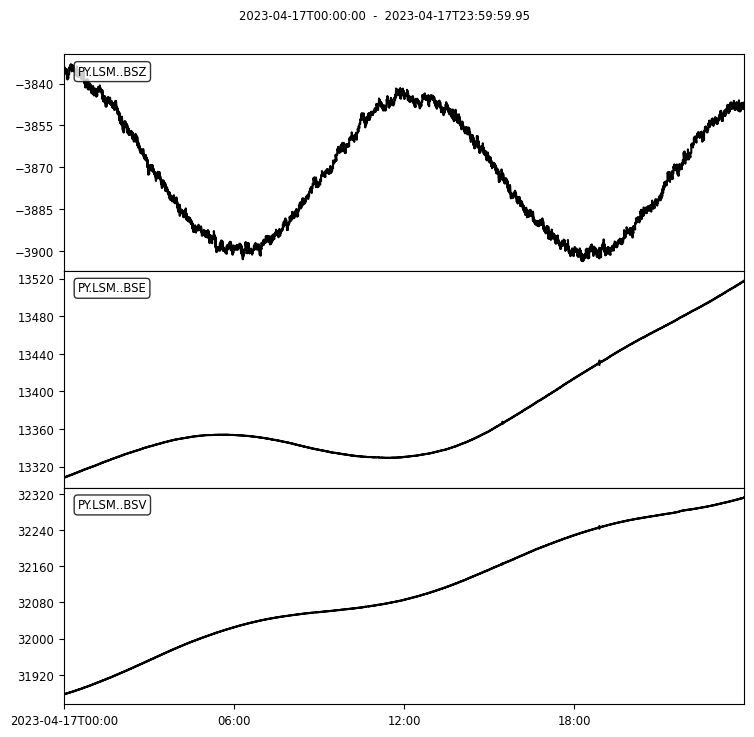

 -> stored stream as: 2023/PY/LSM/BSV.D/PY.LSM..BSV.D.2023.107
 -> stored stream as: 2023/PY/LSM/BSE.D/PY.LSM..BSE.D.2023.107
 -> stored stream as: 2023/PY/LSM/BSZ.D/PY.LSM..BSZ.D.2023.107


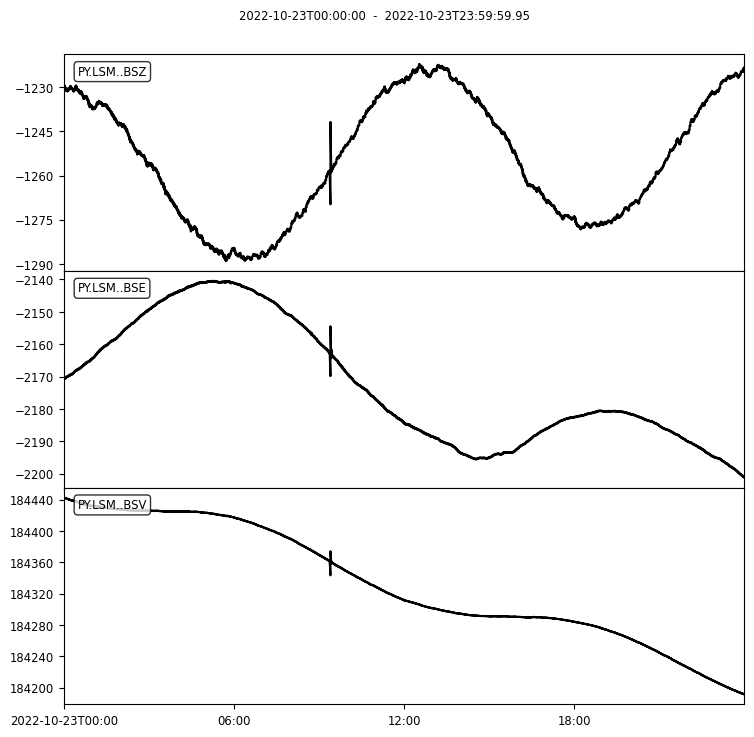

 -> stored stream as: 2022/PY/LSM/BSV.D/PY.LSM..BSV.D.2022.296
 -> stored stream as: 2022/PY/LSM/BSE.D/PY.LSM..BSE.D.2022.296
 -> stored stream as: 2022/PY/LSM/BSZ.D/PY.LSM..BSZ.D.2022.296


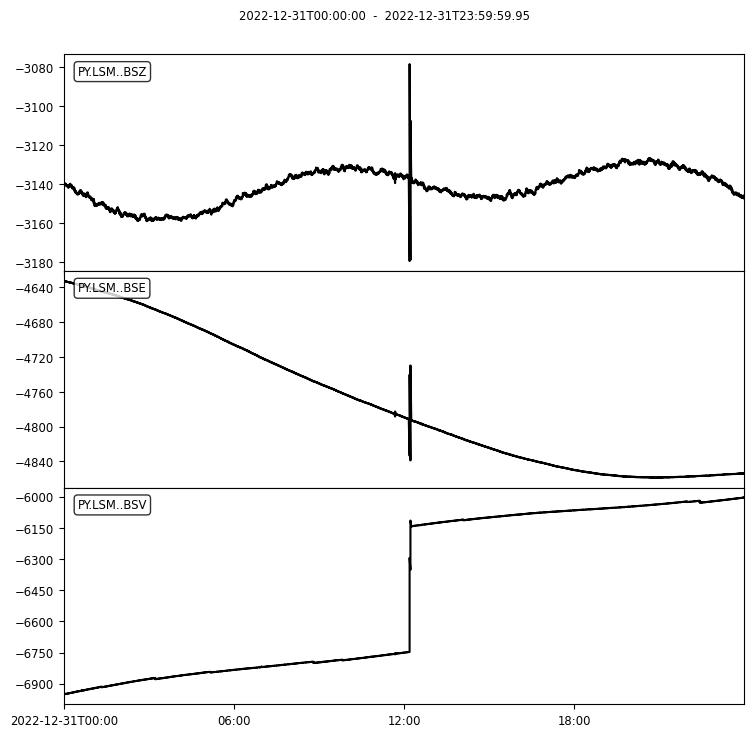

 -> stored stream as: 2022/PY/LSM/BSV.D/PY.LSM..BSV.D.2022.365
 -> stored stream as: 2022/PY/LSM/BSE.D/PY.LSM..BSE.D.2022.365
 -> stored stream as: 2022/PY/LSM/BSZ.D/PY.LSM..BSZ.D.2022.365


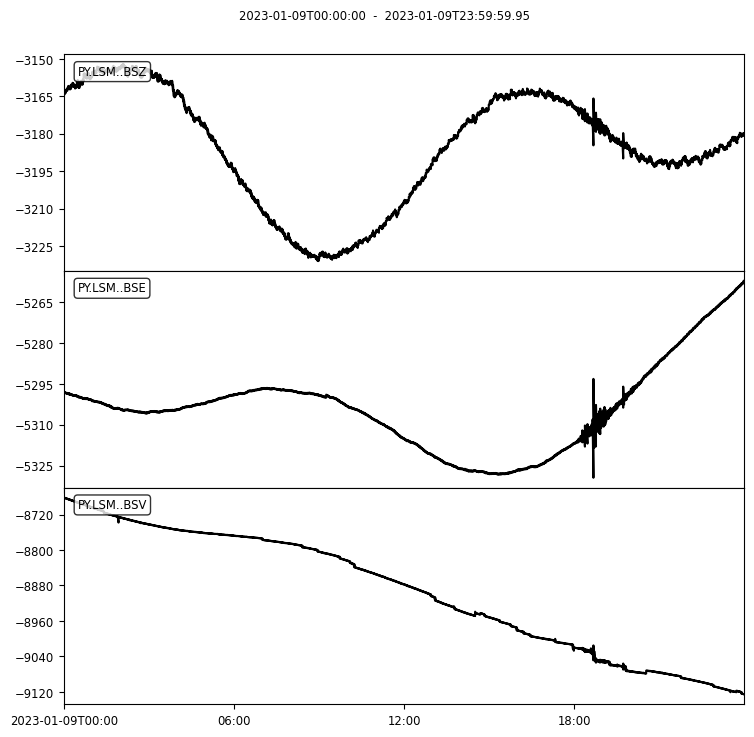

 -> stored stream as: 2023/PY/LSM/BSV.D/PY.LSM..BSV.D.2023.009
 -> stored stream as: 2023/PY/LSM/BSE.D/PY.LSM..BSE.D.2023.009
 -> stored stream as: 2023/PY/LSM/BSZ.D/PY.LSM..BSZ.D.2023.009


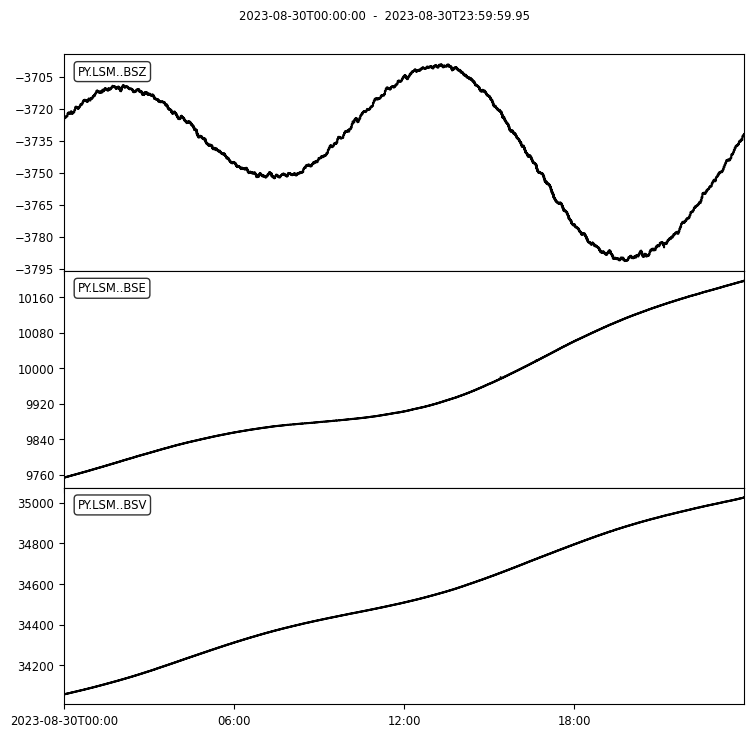

 -> stored stream as: 2023/PY/LSM/BSV.D/PY.LSM..BSV.D.2023.242
 -> stored stream as: 2023/PY/LSM/BSE.D/PY.LSM..BSE.D.2023.242
 -> stored stream as: 2023/PY/LSM/BSZ.D/PY.LSM..BSZ.D.2023.242


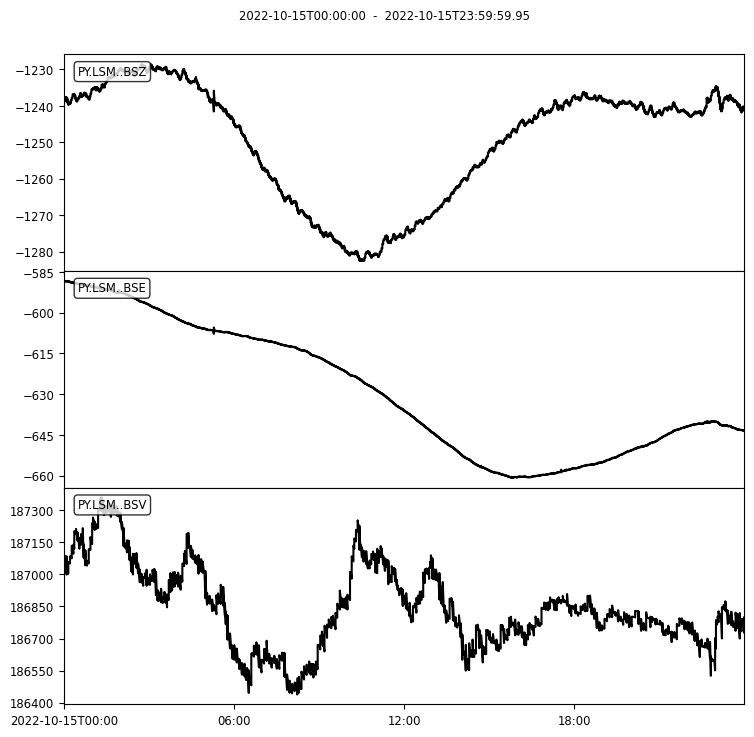

 -> stored stream as: 2022/PY/LSM/BSV.D/PY.LSM..BSV.D.2022.288
 -> stored stream as: 2022/PY/LSM/BSE.D/PY.LSM..BSE.D.2022.288
 -> stored stream as: 2022/PY/LSM/BSZ.D/PY.LSM..BSZ.D.2022.288


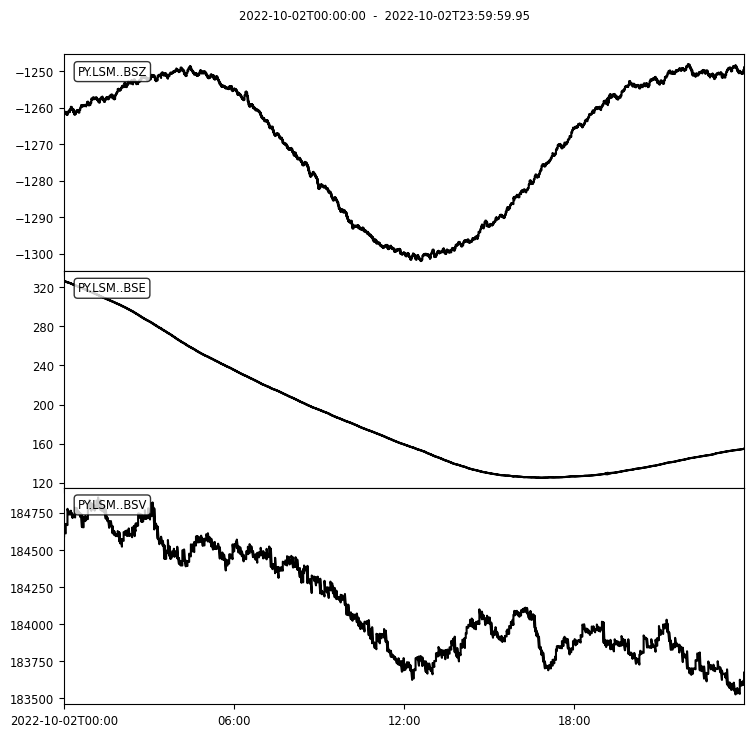

 -> stored stream as: 2022/PY/LSM/BSV.D/PY.LSM..BSV.D.2022.275
 -> stored stream as: 2022/PY/LSM/BSE.D/PY.LSM..BSE.D.2022.275
 -> stored stream as: 2022/PY/LSM/BSZ.D/PY.LSM..BSZ.D.2022.275


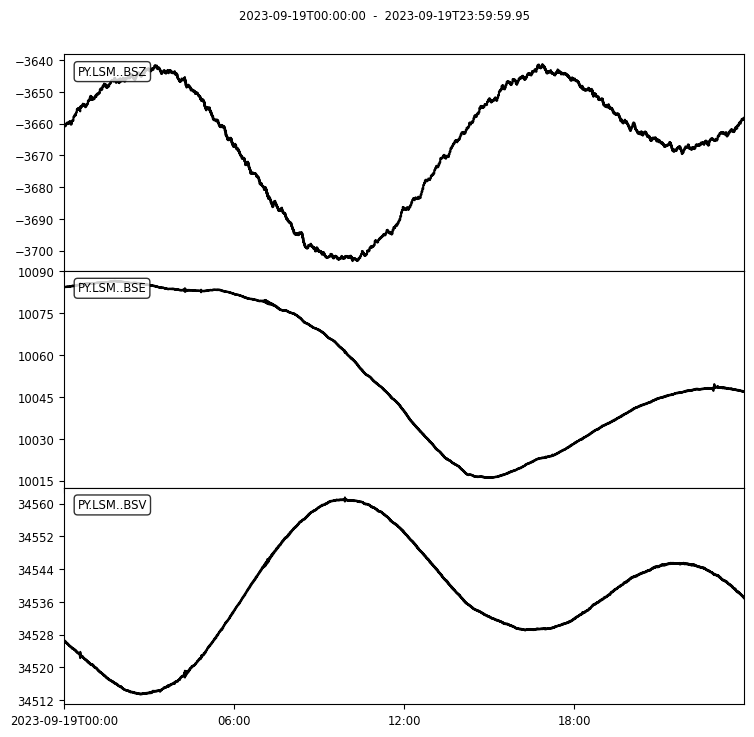

 -> stored stream as: 2023/PY/LSM/BSV.D/PY.LSM..BSV.D.2023.262
 -> stored stream as: 2023/PY/LSM/BSE.D/PY.LSM..BSE.D.2023.262
 -> stored stream as: 2023/PY/LSM/BSZ.D/PY.LSM..BSZ.D.2023.262


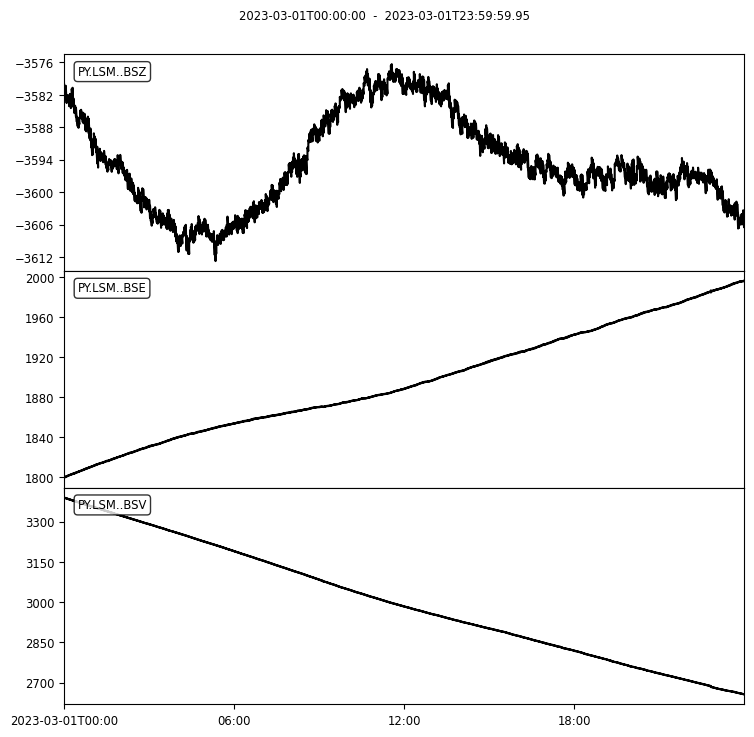

 -> stored stream as: 2023/PY/LSM/BSV.D/PY.LSM..BSV.D.2023.060
 -> stored stream as: 2023/PY/LSM/BSE.D/PY.LSM..BSE.D.2023.060
 -> stored stream as: 2023/PY/LSM/BSZ.D/PY.LSM..BSZ.D.2023.060


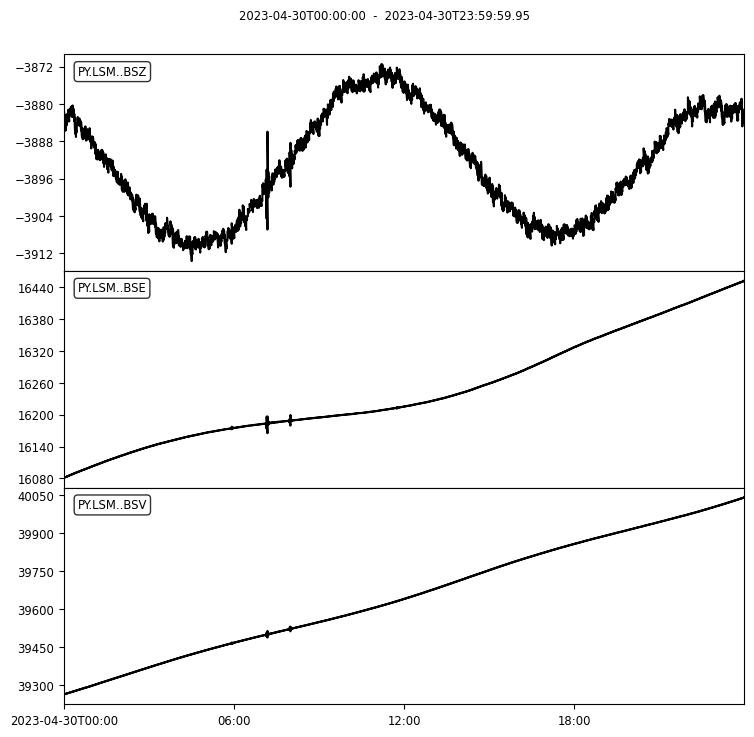

 -> stored stream as: 2023/PY/LSM/BSV.D/PY.LSM..BSV.D.2023.120
 -> stored stream as: 2023/PY/LSM/BSE.D/PY.LSM..BSE.D.2023.120
 -> stored stream as: 2023/PY/LSM/BSZ.D/PY.LSM..BSZ.D.2023.120


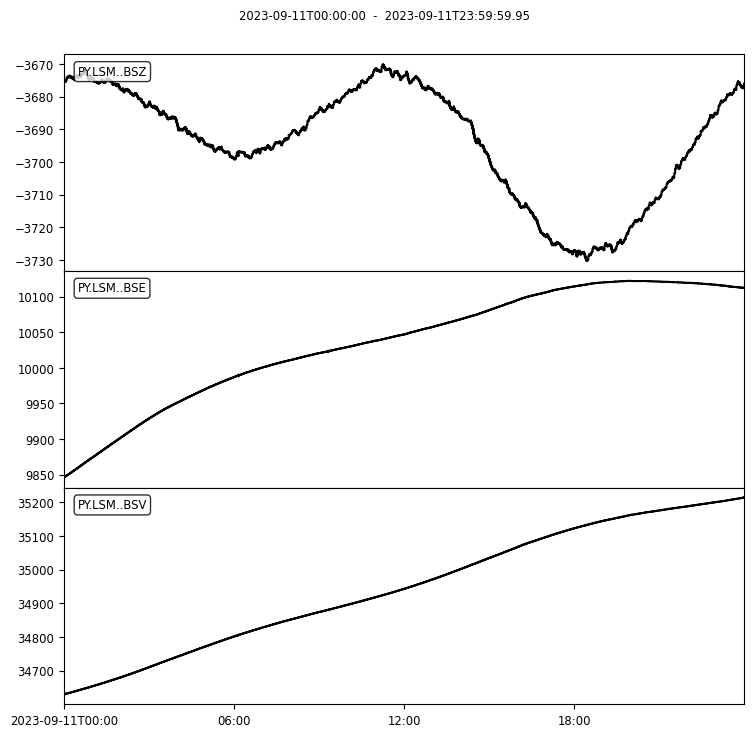

 -> stored stream as: 2023/PY/LSM/BSV.D/PY.LSM..BSV.D.2023.254
 -> stored stream as: 2023/PY/LSM/BSE.D/PY.LSM..BSE.D.2023.254
 -> stored stream as: 2023/PY/LSM/BSZ.D/PY.LSM..BSZ.D.2023.254


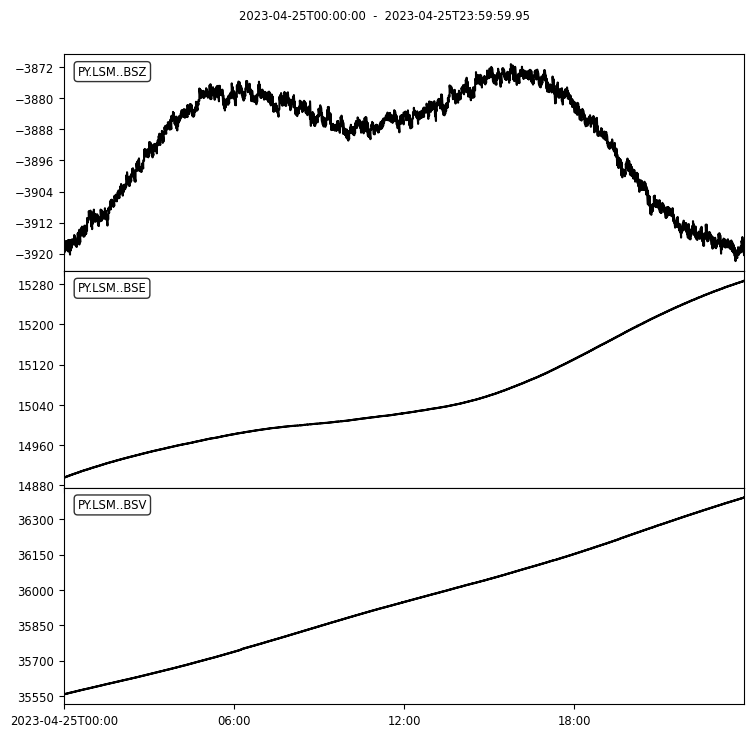

 -> stored stream as: 2023/PY/LSM/BSV.D/PY.LSM..BSV.D.2023.115
 -> stored stream as: 2023/PY/LSM/BSE.D/PY.LSM..BSE.D.2023.115
 -> stored stream as: 2023/PY/LSM/BSZ.D/PY.LSM..BSZ.D.2023.115


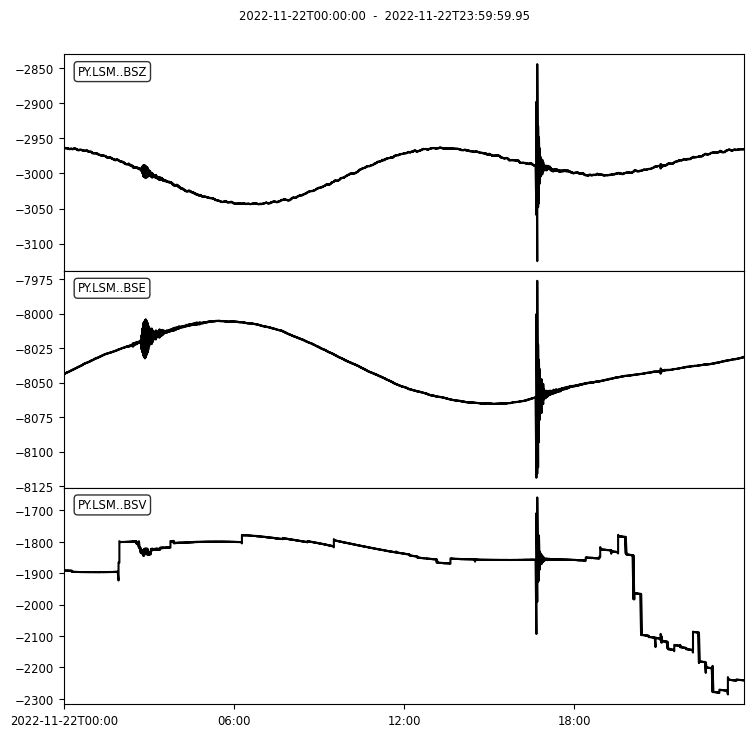

 -> stored stream as: 2022/PY/LSM/BSV.D/PY.LSM..BSV.D.2022.326
 -> stored stream as: 2022/PY/LSM/BSE.D/PY.LSM..BSE.D.2022.326
 -> stored stream as: 2022/PY/LSM/BSZ.D/PY.LSM..BSZ.D.2022.326


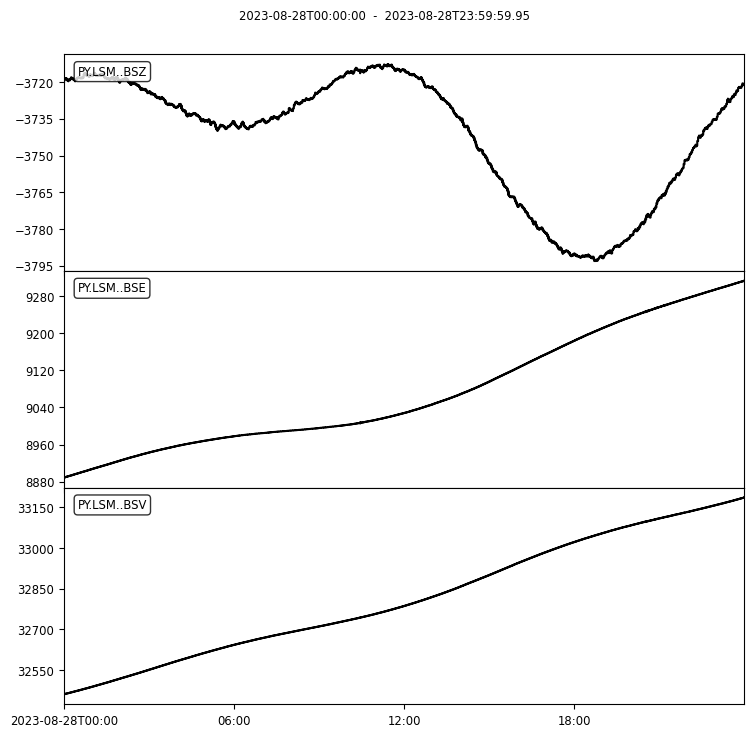

 -> stored stream as: 2023/PY/LSM/BSV.D/PY.LSM..BSV.D.2023.240
 -> stored stream as: 2023/PY/LSM/BSE.D/PY.LSM..BSE.D.2023.240
 -> stored stream as: 2023/PY/LSM/BSZ.D/PY.LSM..BSZ.D.2023.240


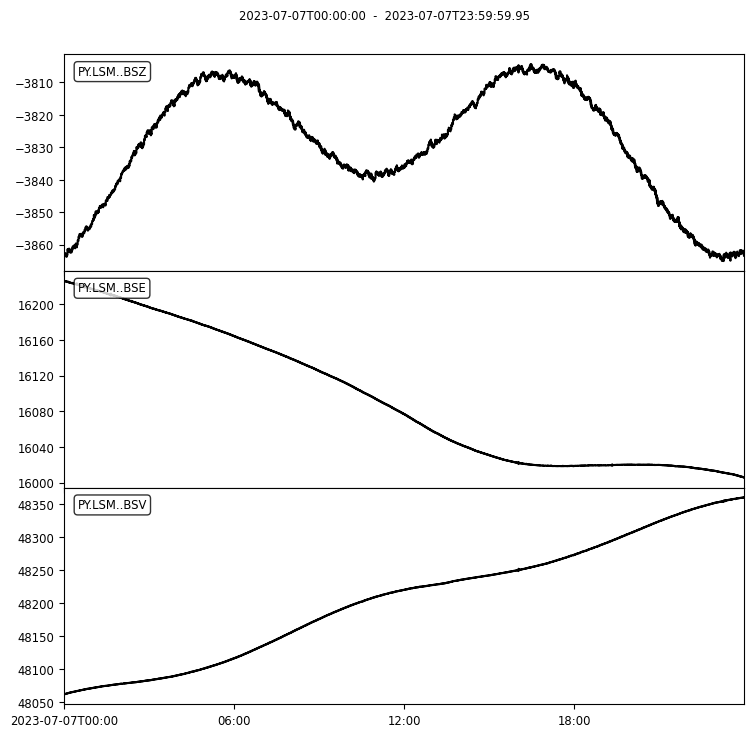

 -> stored stream as: 2023/PY/LSM/BSV.D/PY.LSM..BSV.D.2023.188
 -> stored stream as: 2023/PY/LSM/BSE.D/PY.LSM..BSE.D.2023.188
 -> stored stream as: 2023/PY/LSM/BSZ.D/PY.LSM..BSZ.D.2023.188


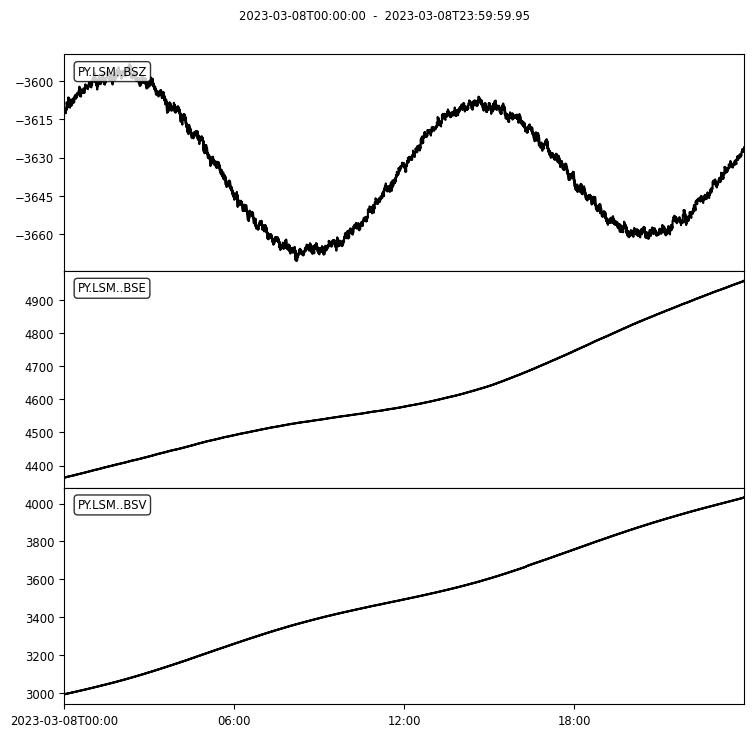

 -> stored stream as: 2023/PY/LSM/BSV.D/PY.LSM..BSV.D.2023.067
 -> stored stream as: 2023/PY/LSM/BSE.D/PY.LSM..BSE.D.2023.067
 -> stored stream as: 2023/PY/LSM/BSZ.D/PY.LSM..BSZ.D.2023.067


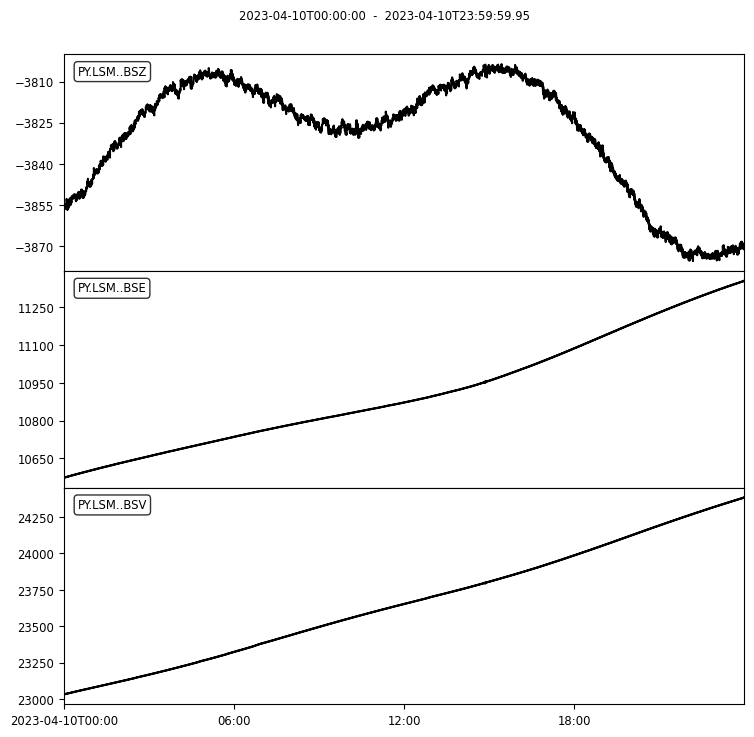

 -> stored stream as: 2023/PY/LSM/BSV.D/PY.LSM..BSV.D.2023.100
 -> stored stream as: 2023/PY/LSM/BSE.D/PY.LSM..BSE.D.2023.100
 -> stored stream as: 2023/PY/LSM/BSZ.D/PY.LSM..BSZ.D.2023.100


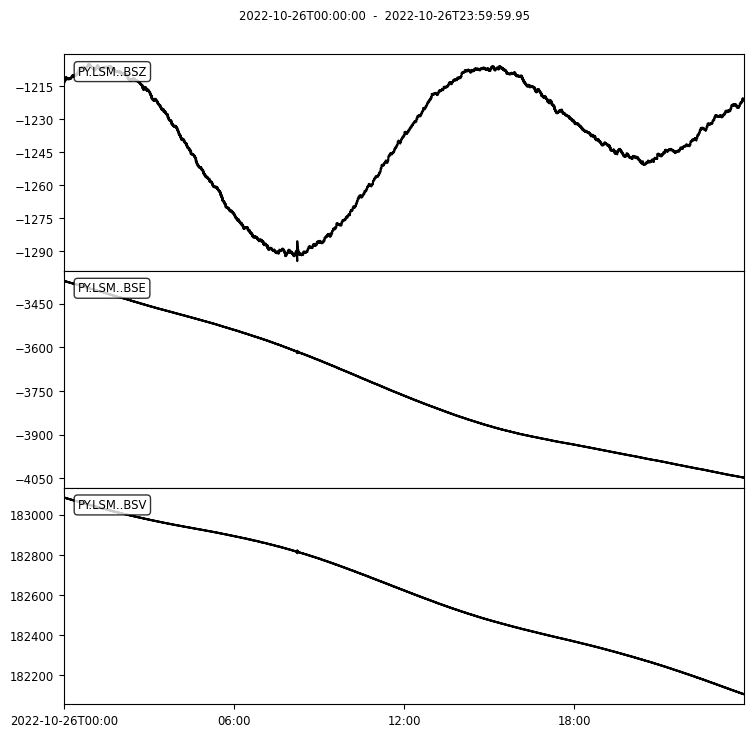

 -> stored stream as: 2022/PY/LSM/BSV.D/PY.LSM..BSV.D.2022.299
 -> stored stream as: 2022/PY/LSM/BSE.D/PY.LSM..BSE.D.2022.299
 -> stored stream as: 2022/PY/LSM/BSZ.D/PY.LSM..BSZ.D.2022.299


In [75]:
for day in dates:

    df_EW = read_csv(path_to_data+f"EW-{day}.ascii", names=["EW"])
    df_NW = read_csv(path_to_data+f"NW-{day}.ascii", names=["NW"])
    df_ZZ = read_csv(path_to_data+f"vertical-{day}.ascii", names=["ZZ"])

    date = datetime.strptime(day[:4] + "-" + day[-3:].rjust(3, '0'), "%Y-%j").strftime("%Y-%m-%d")

    NW = __create_trace(df_NW.NW, df, "PY.LSM..BSV", f"{date} 00:00:00")
    EW = __create_trace(df_EW.EW, df, "PY.LSM..BSE", f"{date} 00:00:00")
    ZZ = __create_trace(df_ZZ.ZZ, df, "PY.LSM..BSZ", f"{date} 00:00:00")

    st_out = Stream(traces=[NW, EW, ZZ])

    st_out.plot(equal_scale=False);

    __write_stream_to_sds(st_out, path_to_out_data)
